# TP1 son 
## Hocine ABDELHAMID 
### M2 ISI, 21100727
----

### TP1 : propagation of a sound wave and acquisition with a microphone array

In this tutorial, we will study the sound wave we get on output when the microphone are in an array configuration.


### 1.1 preparation
1. Express $z_n$ as a function of the spacing d between the microphones.

On a directement : 
$$z_n = d\times(n - \frac{N}{2}) - \frac{d}{2}$$



### 1.1.1 Wave Front

#### Assumption 1 : the wave front is assumed to be a plane, cf. Fig1.
2. Express $d_n$ as a function of $z_n$ and the angle  $\theta _s$ , which is the angle of incidence defined
with respect to the axis [O, z] of the microphone array.
<img src= "images/Fig1.png">

$$d_n = -z_n\times cos(\theta _s)$$

this distance can either be positive or negative, depending on what microphone. A negative $d_n$ would represent a microphone that is closer from the source from the origin



3. Deduce the angle of incidence  $\theta _s$ , as a function of the delay $\delta _{\tau _n}$ 

as we have $d_n$, we know that $\delta _{\tau _n}  = \frac{d_n}{c}$ where c, is the sound celerity
$$\delta _{\tau _n}  = \frac{d_n}{c} = \frac{-z_n\times cos(\theta _s)}{c}$$
$$\theta _s = Arccos(-\frac{\delta _{\tau _n}c}{z_n})


### Assumption 2 : the wave front is assumed to be spherical, cf. Fig2.
4. Express the (Cartesian) coordinates of the source ($x_s$ , $z_s$ ) as a function of the distance $r_s$ between the source and the centre of the microphone array, the position of the $n_{th}$ microphone $z_n$ , the distance $d_n$ and the angles  $\theta _s$ and $d_n$ , the angle between the wave arriving at the $n_{th}$ microphone and that arriving at O.

here $d_n$ isn't equal to $d_n = z_n\times cos(\theta _s)$ anymore

we have :
$$z_n  = (r_s + d_n)\times sin(\alpha _s + d\alpha _n) + z_n$$
$$x_n  = (r_s + d_n)\times cos(\alpha _s + d\alpha _n)$$


In [1]:
# All required import
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
from client import array
import time
from utils import * 
#%matplotlib notebook
%matplotlib ipympl
# Faire la phase en f0, calculer le déphasage, retrouver delta _t .

In [2]:
# Case qui permet l'acquisiton et l'enrigistremetn
antenne=array('server') 

In [27]:
# m = antenne = array("play")

# Au lieu de rejouer le fichier antenne a chaque fois avec array("play") (ce qui est long et nécessite de restart le kernel a cause d'un bug)
# On va enregistrer le premier buffer de chaque fichier h5 grace a la fonction suivante dans utils.py

# Inutile de lancer si le dossier existe déjà
# save_folder_of_h5files_as_dict(folder_path="50cm_lateral", save_destination="matrices")

# Il nous suffit ensuite de load le dictionnaire grace a np.load(picke= true)
# 2eme facon de faire : 
dic, antena = transform_h5_to_dict("50cm_lateral/100.h5")  #qui nous retourne directement l'antenne créer a partir du fichier passé en paramètre sans passer par le gui


{'50cm_lateral/100.h5': {'analogs': array([], dtype=float64), 'analogs_number': 0, 'channels_number': 8, 'comment': '', 'compression': False, 'counter': False, 'counter_skip': False, 'dataset_duration': 1, 'dataset_length': 20000, 'dataset_number': 2, 'datatype': 'int32', 'date': '2022-11-16 11:45:42.921823', 'duration': 2, 'mems': array([16, 17, 18, 19, 20, 21, 22, 23]), 'mems_number': 8, 'sampling_frequency': 20000.0, 'timestamp': 1668595542.921823}}


### 1.2.2 Speed of sound

On charge dans un premier temps , le fichier à 100 Hz

In [9]:
#Fichier a 100 Hz
antenne100 = np.load("matrices/100.npy", allow_pickle= True).item()
m = antenne100['mat']
Fs = antenne100['fs']
BLK = antenne100['blocksize']
N = antenne100['N']
d = antenne100['interspace']

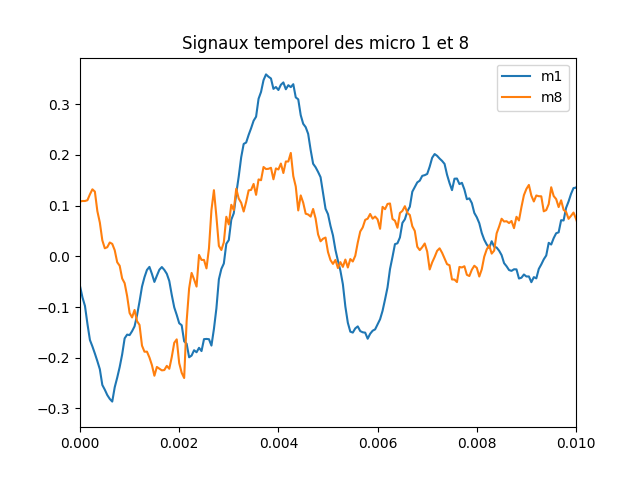

In [13]:
t = [i/Fs for i in range(m.shape[1])]
# Affichage du isgnal
def trace_m1_m8(m, xmax = 0.01, f0 = None):
    s = ''
    if f0 is not None:
        s = f'enregistré sur un son de {f0} hz'
    plt.figure()
    for i in [0,7]:
        plt.plot(t,m[i], label= f"m{i +1}")
    plt.legend()
    plt.title(f'Signaux temporel des micro 1 et 8 {s}')
    plt.xlim((0,xmax))
    plt.xlabel=("t (s)")
    plt.ylabel=("x")
trace_m1_m8(m)


Le signal est plutot bruité, mais il sera possible de retrouver la vitesse du son comme on le verra par la suite

On trace le module de la transformé de fourrier ainsi que la phase pour les micros 1 et 8

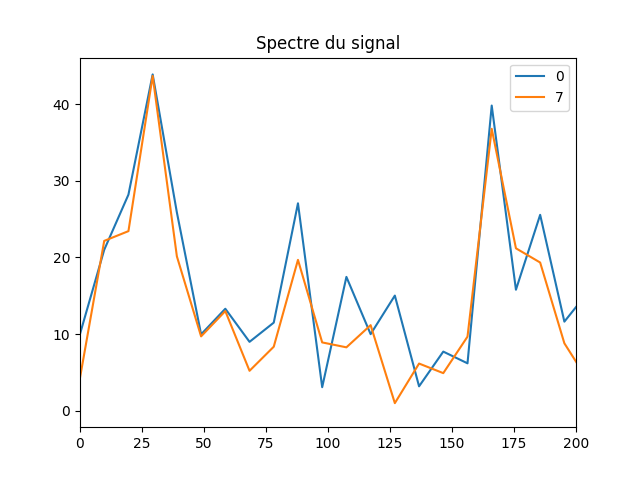

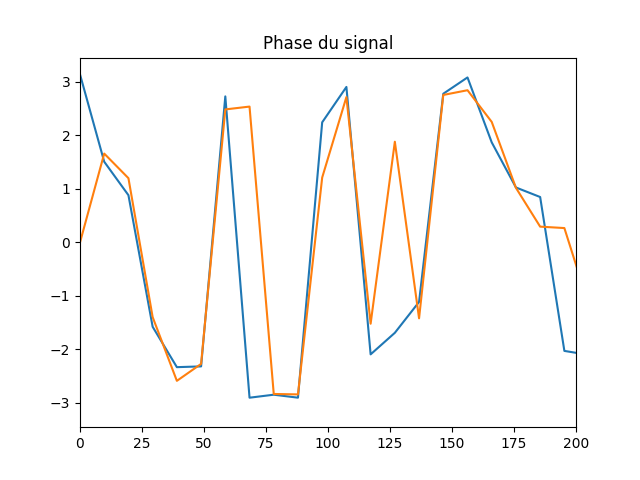

In [14]:
mics = [0,7]

for i in mics:
    # fourier, fonction défini dans utils.py
    fourier(m[i], Fs,i, "modulus", newFig = not i, limaxis = (0,200))
plt.legend()
for i in mics:
    fourier(m[i], Fs, i, "phase", newFig = not i, limaxis = (0,200))


5. Measure the time needed by the wave to travel the distance between the microphones,
using :

— (a) the observation of the waveform

— (b) the phase of the spectra.
6. Deduce the speed of sound propagation, also known as the celerity. Compare with the
theoretical value at room temperature.

a) On observe le déphasage entre les deux signaux temporelle, on recueille le temps t pour lesquel lees signaux sont dans la meme configurations.
    il suffit ensuite de faire v = (d*7)/(t2-t1)

<img src= "images/WF_100hz.png"/>

En s'attardant sur le deux premiers pics on a : </br>
t2 = 0.00150s </br>
t1 = 0.0002s </br>
En faisant le calcul on trouve v = 323m/s  ce qui semble plutot correte en comparaison des 340m/s théorique à température ambiante</br>

b) On observe le déphasae en f0 = 100hz, on peut ensuite retrouver le retard : $\Delta t = \frac{\Delta \phi}{2 \pi f_0}$ </br>
a 100hz on a : </br>
<img src="images/p100hz.png"/>

$\phi _1 = 2.396$ </br>
$\phi _2 = 1.565$ </br>
donc $\Delta \phi  = 0.831$ et $\Delta t = 1.322e-3$

on trouve alors v = $\frac{0.06*7}{\Delta t}$ = 317m/s 
ce qui est encore assez proche de la vitesse théorique a temperature ambiante



7. Repeat the previous steps at a frequency of 3 kHz

{'50cm_lateral/3000hz.h5': {'analogs': array([], dtype=float64), 'analogs_number': 0, 'channels_number': 8, 'comment': '', 'compression': False, 'counter': False, 'counter_skip': False, 'dataset_duration': 1, 'dataset_length': 20000, 'dataset_number': 6, 'datatype': 'int32', 'date': '2022-11-16 09:34:27.318821', 'duration': 6, 'mems': array([16, 17, 18, 19, 20, 21, 22, 23]), 'mems_number': 8, 'sampling_frequency': 20000.0, 'timestamp': 1668587667.318821}}


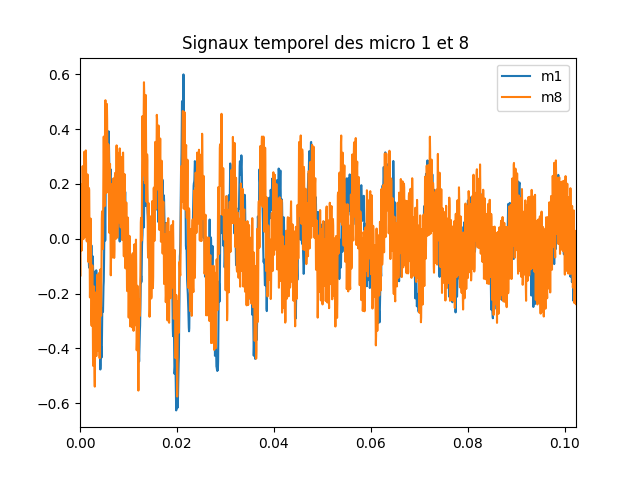

In [18]:
# cette fonction lit le fichier h5 directement depuis le path
d, antenne3000 = transform_h5_to_dict("50cm_lateral/3000hz.h5")
trace_m1_m8(d['mat'], max(t))


Un pic en 0.00923 un autre en 0.00783
Ce qui donne v = 300 m/s


En zoomant, on obtient une vitesse v de 54m/s ce qui est trop éloigné de la valeur réel de la vitesse a 21degré dans l'air

/media/huss/CE6698AB66989635/Users/tendl/Desktop/M2/Son/TP/TP/utils.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


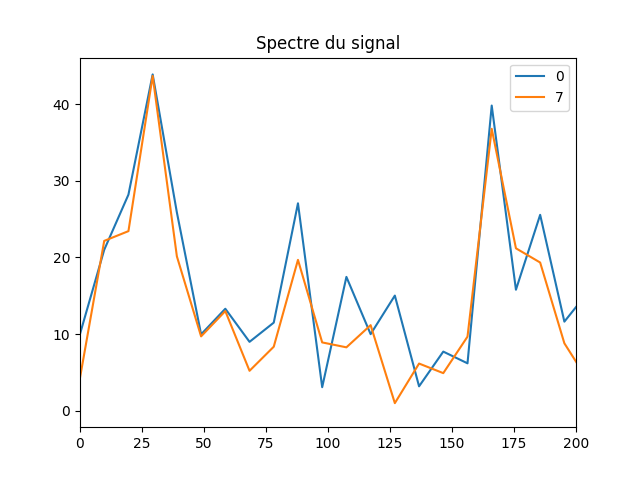

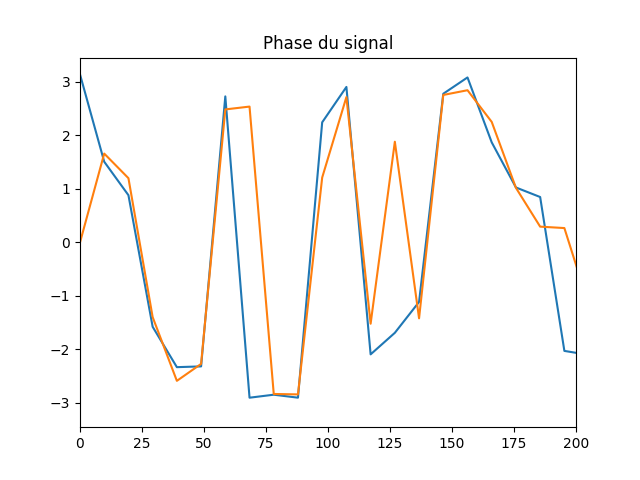

In [46]:
mics = [0,7]

for i in mics:
    # fourier, fonction défini dans utils.py
    fourier(m[i], Fs,i, "modulus", newFig = not i, limaxis = 200)
plt.legend()
for i in mics:
    fourier(m[i], Fs, i, "phase", newFig = not i, limaxis = 200)


On observe bien un pic a 100 hz, mais aussi un pic plus grand a 175. celui ci est du au gens qui parletn dans la salle


[-0.21, -0.15, -0.09, -0.03, 0.03, 0.09, 0.15, 0.21]
